### Setup plotting

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

### Probably not needed on your install

At the time of testing on my install there were some "future" warnings coming out of h5py library.

In [2]:
import warnings
warnings.filterwarnings('ignore', module="h5py")

### Main part starts now

In [3]:
from mpnetcdf4 import nc_open

In [4]:
fname, measurements = './sample.nc', ['red', 'green', 'blue']
src_roi = np.s_[:, :400, 2000:2400] # Select region of interest, None or omitted -- all

with nc_open(fname, num_workers=2) as f:
    out = f.read(measurements=measurements, src_roi=src_roi)
    
print("Read bands:", list(out))

Read bands: ['red', 'green', 'blue']


### Plot the result

We assume test data has time,y,x dimension, we plotting first time slice

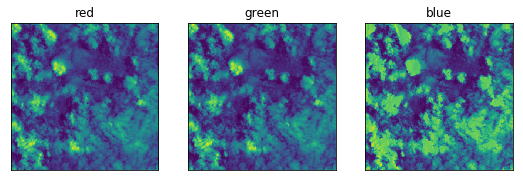

In [5]:
fig = plt.figure(figsize=(9,3))
t_idx = 0
ax = fig.subplots(1, len(measurements))

for ax,b in zip(ax, measurements):
    ax.imshow(out[b][t_idx])
    
    ax.set_title(b)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
